# Lab Session 8 - Coursework Assignment #2 
### k23075825 Yi-Lung (Dragon) Tsai

*** 




These exercises will be part of your *formal assessment*. They constitute 20% of the overall mark for this module.

You should create a Jupyter Notebook, Word document, or PDF file (although using Jupyter Notebook is the strongly preferred option here), which contains all of your Python code, and any output that it produces. For longer solutions, you should also make use of Python comments, as well as additional written explanations of your code. You must submit the final .ipynb file to KEATS no later than the deadline on 15 December. This deadline is set so as to give you a large amount of time and freedom for working on this piece of coursework, but it is expected that you are able to submit the solutions much sooner than this deadline, and you are encouraged to do so. You may discuss the exercises with each other, but the final report should be your own work, and you must ensure that you have read the `school's policy regarding plagiarism`. Plagiarism is passing off someone else’s work as your own, and the penalties for plagiarising by the College can be severe. Uploading work to KEATS is regarded by the Department as a statement by the student concerned, confirming that the work has not been plagiarised.

## Assessment criteria

The overall mark for this coursework will be based on a qualitative assessment of your overall report. The assessment criteria will include:

- The clarity and coherence of your explanations.
- Your ability to critically discuss your results.
- The overall presentation of the report, including spelling, grammar, use of appropriate technical language, and the clarity of your graphs (ensure that graphs are appropriately labeled).
- Whether your data manipulation and analysis was carried out thoroughly and correctly.
- Your ability to formulate your own solutions to problems, and to apply knowledge gained from extended reading beyond the recommended texts.
## Preliminaries

In this coursework you will analyse stocks comprising the Standard and Poor's 100 index. The assignment has been structured into separate exercises given below.

You will need to download a .csv-file containing daily adjusted closing prices for the components of the S&P 100 index. This data can be `downloaded from the KEATS page`.

You can then read this file into a Pandas DataFrame using code similar to that below.

In [80]:
import pandas as pd
import numpy as np

In [81]:
prices = pd.read_csv("C:/Users/user/Desktop/sap100.csv") # Read the CSV file from the specified path in my laptop

In [82]:
prices.head()

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
0,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
1,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
3,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
4,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


In [84]:
def prices_from_csv(fname):
    df = pd.read_csv(fname) # Read the CSV file into a DataFrame
    df.set_index(pd.to_datetime(df['Date']), inplace=True) # Set the 'Date' column as the index and convert it to datetime format
    return df

sap100 = prices_from_csv("C:/Users/user/Desktop/sap100.csv") # Load price data and assign it to the 'sap100' DataFrame
sap100.head()

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-06,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
2016-06-07,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2016-06-08,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
2016-06-09,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
2016-06-10,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


In [212]:
cleandata = sap100.dropna(axis ="columns") # Remove columns with missing values from the 'sap100' DataFrame
cleandata.head()

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-06,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
2016-06-07,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2016-06-08,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
2016-06-09,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
2016-06-10,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


### Exercise 1

Choose a single stock from the index, and compute the corresponding daily, monthly and annual log-returns. For each sampling frequency, test whether the returns are normally distributed. Include appropriate graphs in your final report and ensure that you clearly explain your analysis in your own words.

> *explanation: I will pick stock "Visa" to compute daily, monthly and annual log-returns, and test whether the returns are normally distributed.*

###### Daily log-returns

Date
2016-06-06     80.540001
2016-06-07     80.599998
2016-06-08     81.650002
2016-06-09     81.260002
2016-06-10     80.180000
                 ...    
2023-07-07    236.449997
2023-07-10    238.160004
2023-07-11    240.550003
2023-07-12    242.210007
2023-07-13    243.809998
Name: V, Length: 1788, dtype: float64


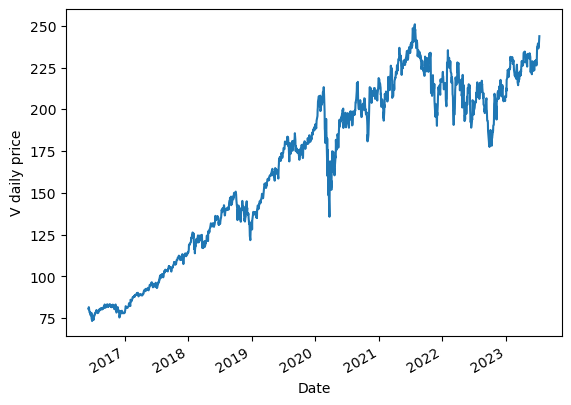

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

daily_prices = sap100["V"] # Extract the 'V' column from the 'sap100' DataFrame and assign it to 'daily_prices'
print(daily_prices) 
daily_prices.plot() 
plt.ylabel('V daily price') # Set the y-axis label for the plot
plt.show() 

            V daily log-returns
Date                           
2016-06-07             0.000745
2016-06-08             0.012943
2016-06-09            -0.004788
2016-06-10            -0.013380
2016-06-13            -0.022450
...                         ...
2023-07-07            -0.010225
2023-07-10             0.007206
2023-07-11             0.009985
2023-07-12             0.006877
2023-07-13             0.006584

[1787 rows x 1 columns]


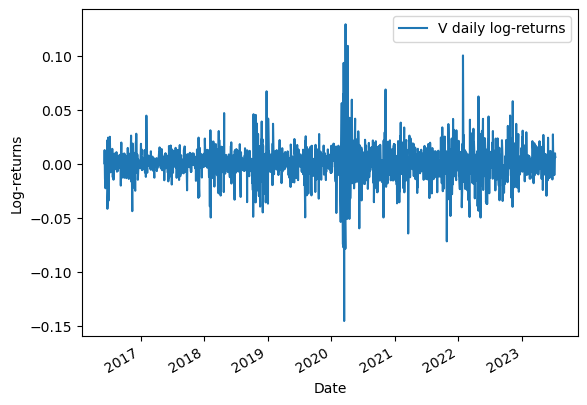

In [227]:
daily_log_returns = np.diff(np.log(daily_prices)) # Calculate daily log returns for the 'V' column
daily_log_returns_df = pd.DataFrame({"V daily log-returns":daily_log_returns},index=daily_prices.index[1:])
# Create a DataFrame with the calculated daily log returns and set the index
print(daily_log_returns_df)
daily_log_returns_df.plot()
plt.ylabel('Log-returns') # Set the y-axis label for the plot
plt.show()

In [88]:
# Display descriptive statistics for the 'V daily log-returns' DataFrame
daily_log_returns_df.describe()

,V daily log-returns
count,1787.000000
mean,0.000620
std,0.016428
min,-0.145571
25%,-0.006656
50%,0.001446
75%,0.008307
max,0.129647


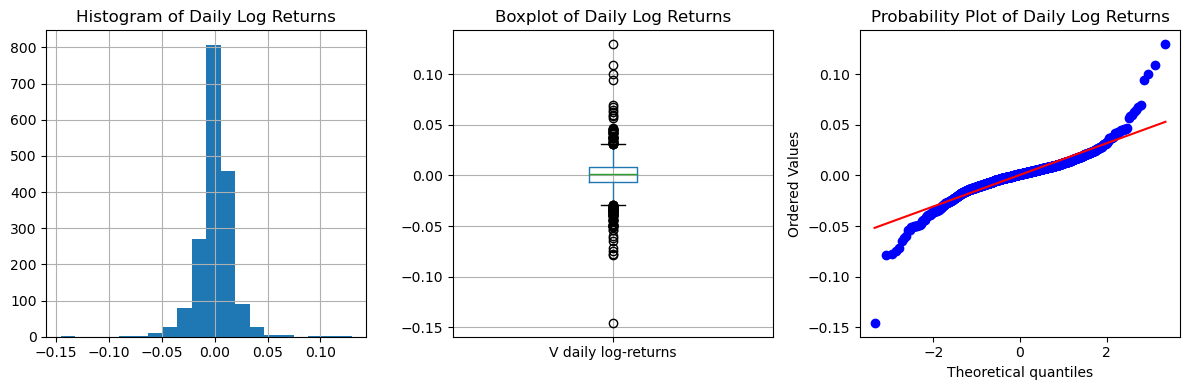

In [319]:
import matplotlib.pyplot as plt
from scipy import stats

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4)) # Create subplots with a 1x3 grid and set the figure size

daily_log_returns_df.hist(bins=20, ax=ax1)
ax1.set_title('Histogram of Daily Log Returns')

daily_log_returns_df.boxplot(ax=ax2)
ax2.set_title('Boxplot of Daily Log Returns')

stats.probplot(daily_log_returns, dist="norm", plot=ax3)
ax3.set_title('Probability Plot of Daily Log Returns')

plt.tight_layout() # Adjust layout for better presentation

plt.show()

In [112]:
# Because large sample n < 2000, we don't use jarque_bera function in scipy.
import numpy as np
from scipy.stats import skew, kurtosis

def jb(n, s, k):
    return n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)


# Perform the Jarque-Bera test
result = jb_test(daily_log_returns)

# Print the test result
print("Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test:", result[0])
print("Empirical JB statistic:", result[1])
print("Critical value at 5% significance level:", result[2])


Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test: True
Empirical JB statistic: 7255.636337989451
Critical value at 5% significance level: 5.966805466708381


> *explanation: Based on the boxplot analysis, numerous outliers were identified. Additionally, we reject the null hypothesis, and the probability plot and Jarque-Bera test indicate the returns are not normally distributed.*

###### Monthly log-returns

Date
2016-06-30     74.169998
2016-07-31     78.050003
2016-08-31     80.900002
2016-09-30     82.699997
2016-10-31     82.510002
                 ...    
2023-03-31    225.460007
2023-04-30    232.729996
2023-05-31    221.029999
2023-06-30    237.479996
2023-07-31    243.809998
Freq: M, Name: V, Length: 86, dtype: float64


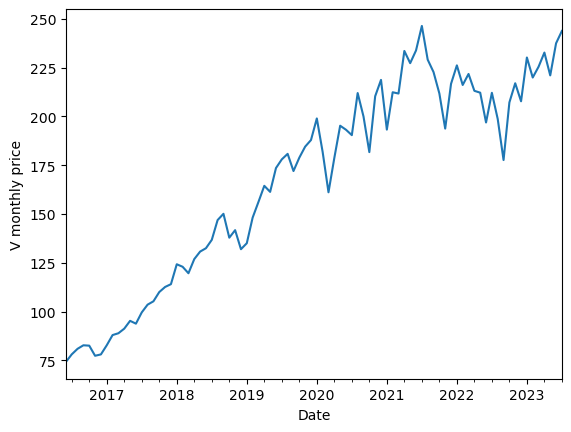

In [96]:
monthly_prices = daily_prices.resample('M').last() # Resample daily prices to monthly frequency, taking the last value of each month
print(monthly_prices)
monthly_prices.plot()
plt.ylabel('V monthly price')
plt.show()

            V monthly log-returns
Date                             
2016-07-31               0.050990
2016-08-31               0.035864
2016-09-30               0.022006
2016-10-31              -0.002300
2016-11-30              -0.064967
...                           ...
2023-03-31               0.024788
2023-04-30               0.031736
2023-05-31              -0.051581
2023-06-30               0.071785
2023-07-31               0.026306

[85 rows x 1 columns]


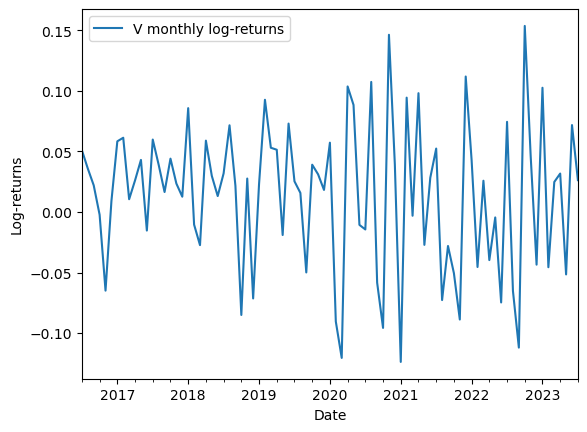

In [228]:
monthly_log_returns = np.diff(np.log(monthly_prices)) # Calculate monthly log returns for the resampled 'V' column
monthly_log_returns_df = pd.DataFrame({"V monthly log-returns": monthly_log_returns}, index=monthly_prices.index[1:])
print(monthly_log_returns_df)
monthly_log_returns_df.plot()
plt.ylabel('Log-returns')
plt.show()

In [99]:
# Display descriptive statistics for the 'V monthly log-returns' DataFrame
monthly_log_returns_df.describe()

,V monthly log-returns
count,85.000000
mean,0.014000
std,0.061011
min,-0.123853
25%,-0.027376
50%,0.024788
75%,0.052364
max,0.153676


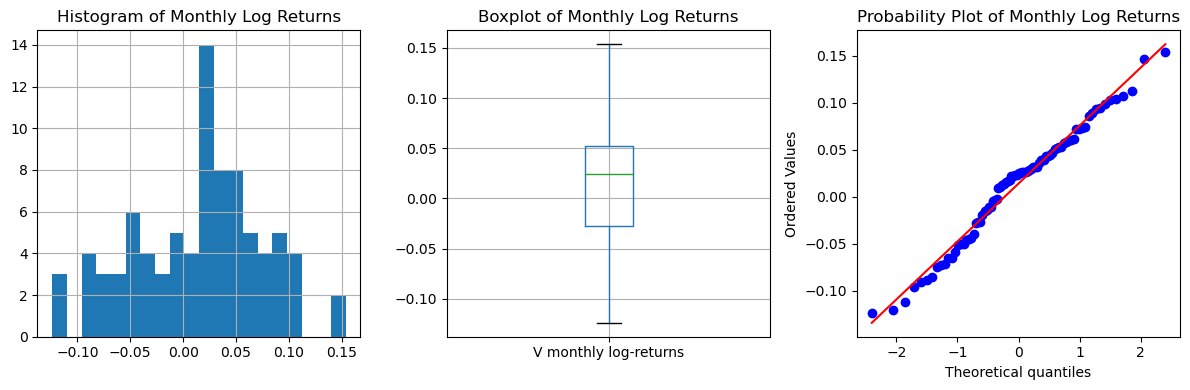

In [350]:
import matplotlib.pyplot as plt
from scipy import stats

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4)) # Create subplots with a 1x3 grid and set the figure size

monthly_log_returns_df.hist(bins=20, ax=ax1)
ax1.set_title('Histogram of Monthly Log Returns')

monthly_log_returns_df.boxplot(ax=ax2)
ax2.set_title('Boxplot of Monthly Log Returns')

stats.probplot(monthly_log_returns, dist="norm", plot=ax3)
ax3.set_title('Probability Plot of Monthly Log Returns')

plt.tight_layout() # Adjust layout for better presentation

plt.show()


In [113]:
# Because large sample n < 2000, we don't use jarque_bera function in scipy.
import numpy as np
from scipy.stats import skew, kurtosis

def jb(n, s, k): 
    return n / 6. * (s**2 + (((k - 3.)**2) / 4.)) # Jarque-Bera test statistic calculation

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples) # Calculate skewness and kurtosis from bootstrap samples
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k) # Compute Jarque-Bera test statistic using calculated skewness and kurtosis

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)  # Obtain the size of the data sample
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications)) # Generate bootstrap samples from a normal distribution
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)


# Perform the Jarque-Bera test
result = jb_test(monthly_log_returns)

# Print the test result
print("Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test:", result[0])
print("Empirical JB statistic:", result[1])
print("Critical value at 5% significance level:", result[2])


Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test: False
Empirical JB statistic: 1.2433848886554573
Critical value at 5% significance level: 5.396516316748317


> *explanation: Based on the probability plot and Jarque-Bera test, we don't reject the null hypothesis, which means that the returns are normally distributed.*

###### Annual log-returns

Date
2016-12-31     78.019997
2017-12-31    114.019997
2018-12-31    131.940002
2019-12-31    187.899994
2020-12-31    218.729996
2021-12-31    216.710007
2022-12-31    207.759995
2023-12-31    243.809998
Freq: A-DEC, Name: V, dtype: float64


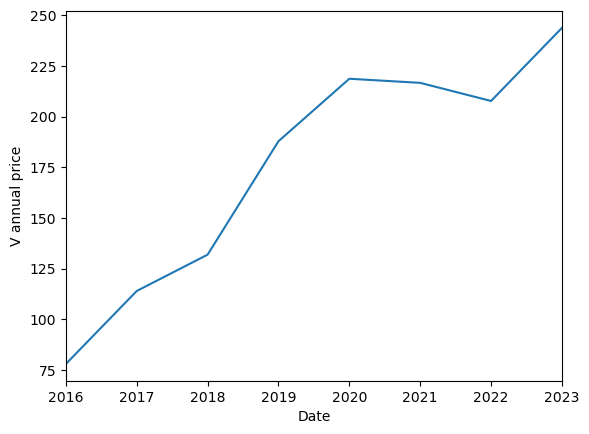

In [102]:
annual_prices = daily_prices.resample('A').last() #Both 'A' and 'Y' can be used to represent annual frequency.
print(annual_prices)
annual_prices.plot()
plt.ylabel('V annual price')
plt.show()

            V annual log-returns
Date                            
2017-12-31              0.379409
2018-12-31              0.145973
2019-12-31              0.353563
2020-12-31              0.151928
2021-12-31             -0.009278
2022-12-31             -0.042177
2023-12-31              0.160006


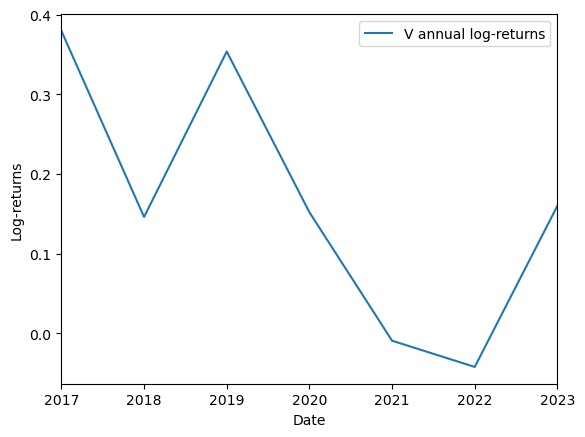

In [229]:
annual_log_returns = np.diff(np.log(annual_prices)) # Calculate annual log returns for the resampled 'V' column
annual_log_returns_df = pd.DataFrame({"V annual log-returns": annual_log_returns}, index=annual_prices.index[1:])
print(annual_log_returns_df)
annual_log_returns_df.plot()
plt.ylabel('Log-returns')
plt.show()

In [105]:
annual_log_returns_df.describe()

,V annual log-returns
count,7.000000
mean,0.162775
std,0.160906
min,-0.042177
25%,0.068348
50%,0.151928
75%,0.256784
max,0.379409


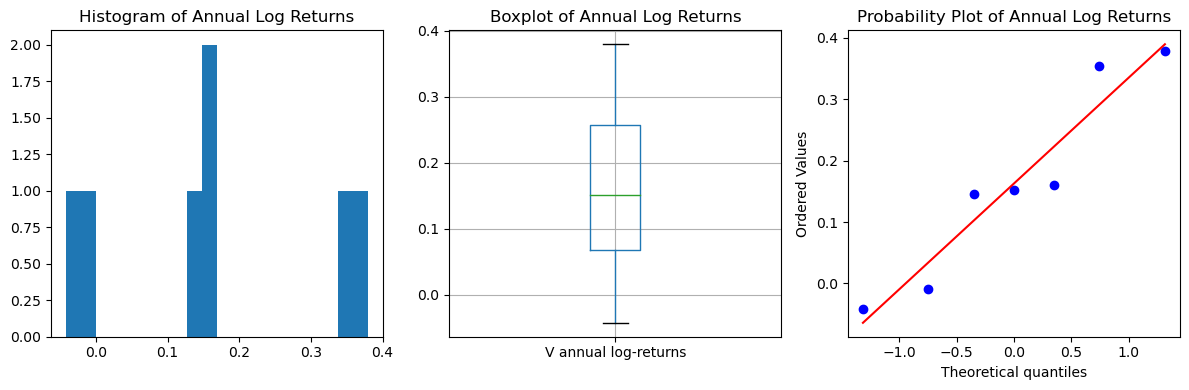

In [349]:
import matplotlib.pyplot as plt
from scipy import stats

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4)) # Create subplots with a 1x3 grid and set the figure size

ax1.hist(annual_log_returns_df, bins=20)
ax1.set_title('Histogram of Annual Log Returns')

annual_log_returns_df.boxplot(ax=ax2)
ax2.set_title('Boxplot of Annual Log Returns')

stats.probplot(annual_log_returns, dist="norm", plot=ax3)
ax3.set_title('Probability Plot of Annual Log Returns')

plt.tight_layout()

plt.show()


In [254]:
# Because large sample n < 2000, we don't use jarque_bera function in scipy.
import numpy as np
from scipy.stats import skew, kurtosis

def jb(n, s, k):
    return n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)


# Perform the Jarque-Bera test
result = jb_test(annual_log_returns)

# Print the test result
print("Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test:", result[0])
print("Empirical JB statistic:", result[1])
print("Critical value at 5% significance level:", result[2])


Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test: False
Empirical JB statistic: 0.4528134118723681
Critical value at 5% significance level: 1.8550142891968555


> *explanation: Based on the Jarque-Bera test, we don't reject the null hypothesis, which means that the returns are normally distributed.*

### Exercise 2
Compute the Jarque-Bera test statistic and $p$-values for all stocks in the index over daily, monthly and annual frequencies. Summarise your results in a single graph which shows three side-by-side boxplots of the test statistic comparing: daily, monthly and annual return distributions. Comment on whether your results support the claim that stock returns exhibit aggregational Gaussianity (see, e.g., Cont 2001; reference below).
> *explanation: Because the sample size < 2000, we don't use jarque_bera function in scipy. We build Jarque-Bera Test using a Bootstrap.*


In [459]:
#JB distribution daily
sample_size_day = len(cleandata["AAPL"]) # Pick stock "Apple" to obtain the size for later use
bootstrap_samples_day  = np.random.normal(size=(sample_size_day, 100000)) #bootstrap_replications=100000
skew_day = skew(bootstrap_samples_day)
kurtosis_day = kurtosis(bootstrap_samples_day, fisher=False)    
jb_distri_day = sample_size_day/6. * (skew_day**2 + (((kurtosis_day- 3.)**2) / 4.))

#JB distribution monthly
sample_size_month = len(cleandata["AAPL"].resample('M').last())
bootstrap_samples_month  = np.random.normal(size=(sample_size_month, 100000))
skew_month = skew(bootstrap_samples_month)
kurtosis_month = kurtosis(bootstrap_samples_month, fisher=False)    
jb_distri_month = sample_size_month/6. * (skew_month**2 + (((kurtosis_month- 3.)**2) / 4.))

#JB distribution annual
sample_size_annual = len(cleandata["AAPL"].resample('A').last())
bootstrap_samples_annual  = np.random.normal(size=(sample_size_annual,100000))
skew_annual = skew(bootstrap_samples_annual)
kurtosis_annual = kurtosis(bootstrap_samples_annual, fisher=False)    
jb_distri_annual = sample_size_annual/6. * (skew_annual**2 + (((kurtosis_annual- 3.)**2) /4.))
                                                              

In [460]:
def calculate_jb_test_statistics(stock_returns, jb_distri):
    # Calculate the Jarque-Bera test statistic and p-value for given stock returns
    stock_size = len(stock_returns)
    empirical_jb_stat = stock_size / 6. * (skew(stock_returns)**2 + (((kurtosis(stock_returns, fisher=False) - 3.)**2) / 4.))
    p_value = np.mean(jb_distri >= empirical_jb_stat)
    
    return empirical_jb_stat, p_value
  

def process_data(column_name, prices):
    # Calculate Jarque-Bera test statistics and p-values for daily, monthly, and annual log returns
    log_returns = np.diff(np.log(prices))
    
    daily_result = calculate_jb_test_statistics(log_returns, jb_distri_day )
    
    monthly_prices = prices.resample('M').last()
    monthly_log_returns = np.diff(np.log(monthly_prices))
    monthly_result = calculate_jb_test_statistics(monthly_log_returns, jb_distri_month)

    annual_prices = prices.resample('A').last()
    annual_log_returns = np.diff(np.log(annual_prices))
    annual_result = calculate_jb_test_statistics(annual_log_returns, jb_distri_annual)

    return {
        'Daily_JB_test_statistic': daily_result[0],  
        'Daily_P_value': daily_result[1],  
        'Monthly_JB_test_statistic': monthly_result[0],  
        'Monthly_P_value': monthly_result[1],  
        'Annual_JB_test_statistic': annual_result[0],  
        'Annual_P_value': annual_result[1]  
    }


# Process data for each column in the dataframe
Allcolumnlist = list(cleandata.columns)
results = []

for column in Allcolumnlist[1:]:
    stock_prices = cleandata[column]
    result = process_data(column, stock_prices)
    results.append(result)

# Create a dataframe to store the results
df = pd.DataFrame(results, index= Allcolumnlist[1:])
df

,Daily_JB_test_statistic,Daily_P_value,Monthly_JB_test_statistic,Monthly_P_value,Annual_JB_test_statistic,Annual_P_value
AAPL,2439.961203,0.0,2.313205,0.21371,0.766756,0.36766
VZ,1690.154729,0.0,2.311690,0.21396,0.410939,0.74631
WBA,3267.973441,0.0,1.203438,0.47645,0.922971,0.23794
WFC,5534.847989,0.0,18.662609,0.00390,0.166364,0.93437
WMT,19080.764191,0.0,10.886206,0.01320,0.611994,0.53191
...,...,...,...,...,...,...
UPS,6892.831103,0.0,1.330387,0.43502,0.472806,0.68295
USB,9913.894501,0.0,37.140526,0.00070,0.891220,0.26039
V,7255.636338,0.0,1.243385,0.46299,0.452813,0.70410
ABBV,19163.769186,0.0,0.946045,0.56899,0.301005,0.84480


In [461]:
# Extract Jarque-Bera test statistics for daily, monthly, and annual intervals from the DataFrame
test_statistic_comparing = df.loc[:,["Daily_JB_test_statistic",'Monthly_JB_test_statistic','Annual_JB_test_statistic']]
test_statistic_comparing      

,Daily_JB_test_statistic,Monthly_JB_test_statistic,Annual_JB_test_statistic
AAPL,2439.961203,2.313205,0.766756
VZ,1690.154729,2.311690,0.410939
WBA,3267.973441,1.203438,0.922971
WFC,5534.847989,18.662609,0.166364
WMT,19080.764191,10.886206,0.611994
...,...,...,...
UPS,6892.831103,1.330387,0.472806
USB,9913.894501,37.140526,0.891220
V,7255.636338,1.243385,0.452813
ABBV,19163.769186,0.946045,0.301005


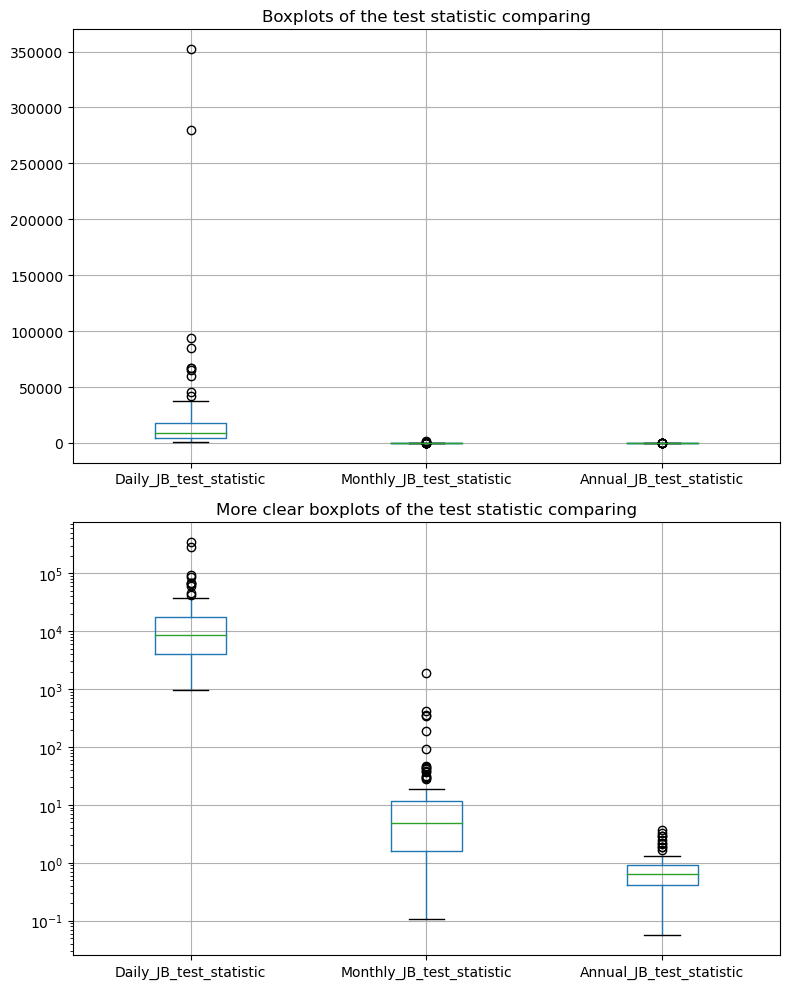

In [462]:
import matplotlib.pyplot as plt
from scipy import stats

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10)) # Create subplots with 2 rows and 1 column

test_statistic_comparing.boxplot(ax=ax1) # Plot boxplots of the Jarque-Bera test statistics for daily, monthly, and annual intervals
ax1.set_title('Boxplots of the test statistic comparing')

test_statistic_comparing.boxplot(ax=ax2) 
plt.yscale("log") # Plot boxplots with a logarithmic scale for better visualization
ax2.set_title('More clear boxplots of the test statistic comparing')

plt.tight_layout() # Adjust layout for better presentation

plt.show()

In [463]:
# Extract p-values for daily, monthly, and annual intervals from the DataFrame
p_value_comparing = df.loc[:,["Daily_P_value",'Monthly_P_value','Annual_P_value']]
p_value_comparing   

,Daily_P_value,Monthly_P_value,Annual_P_value
AAPL,0.0,0.21371,0.36766
VZ,0.0,0.21396,0.74631
WBA,0.0,0.47645,0.23794
WFC,0.0,0.00390,0.93437
WMT,0.0,0.01320,0.53191
...,...,...,...
UPS,0.0,0.43502,0.68295
USB,0.0,0.00070,0.26039
V,0.0,0.46299,0.70410
ABBV,0.0,0.56899,0.84480


<Axes: title={'center': 'P-Value'}>

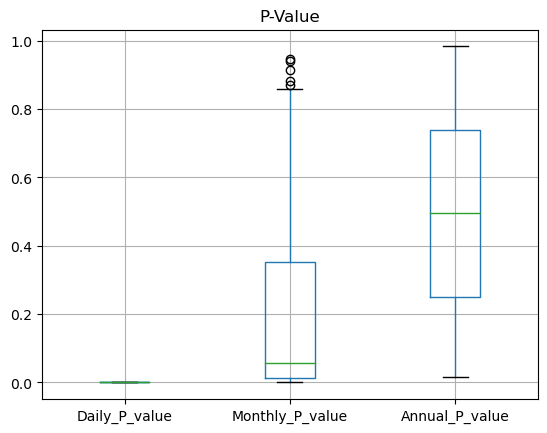

In [464]:
plt.title('P-Value')
p_value_comparing.boxplot() # Plot boxplots of p-values for daily, monthly, and annual intervals

> *explanation: Based on the boxplot of P-Values, it is evident that all daily P-Values are close to zero and less than 0.05, indicating that the daily stock returns distribution deviates from normality. In contrast, for monthly P-Values, some exceed 0.05, suggesting a tendency towards normal distribution in monthly stock returns. Notably, the annual P-Values mostly surpass 0.05, confirming a normal distribution in annual stock returns. In conclusion, this analysis provides evidence supporting the assertion that stock returns demonstrate aggregational Gaussianity.*

### Exercise 3
Download data for the S&P 100 index (symbol `^OEX`), and repeat Exercise 1 with this data.
> *explanation: I will download data for the S&P 100 index from Yahoo Finance.*

In [331]:
import pandas
from pandas_datareader import data
import yfinance as yfin

yfin.pdr_override() # Override pandas_datareader's default implementation with yfinance

# Retrieve historical stock data for the S&P 100 index (^OEX) from Yahoo Finance
OEXframe = data.get_data_yahoo('^OEX', start='2016-06-06', end='2023-07-14')

OEXframe.tail() # Display the last few rows of the obtained DataFrame

# To protect data, I will save the DataFrame to a CSV file
# OEXframe.to_csv("C:/Users/user/Desktop/OEX.csv")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-07,2057.070068,2071.560059,2049.800049,2050.419922,2050.419922,3630480000
2023-07-10,2047.420044,2052.389893,2036.349976,2047.489990,2047.489990,3429600000
2023-07-11,2050.239990,2060.879883,2043.599976,2058.969971,2058.969971,3624220000
2023-07-12,2074.080078,2086.239990,2072.120117,2078.169922,2078.169922,3920290000
2023-07-13,2089.820068,2103.159912,2088.489990,2099.449951,2099.449951,3839530000


###### Daily log-returns

Date
2016-06-06     931.900024
2016-06-07     932.229980
2016-06-08     935.270020
2016-06-09     933.580017
2016-06-10     926.750000
                 ...     
2023-07-07    2050.419922
2023-07-10    2047.489990
2023-07-11    2058.969971
2023-07-12    2078.169922
2023-07-13    2099.449951
Name: Adj Close, Length: 1788, dtype: float64


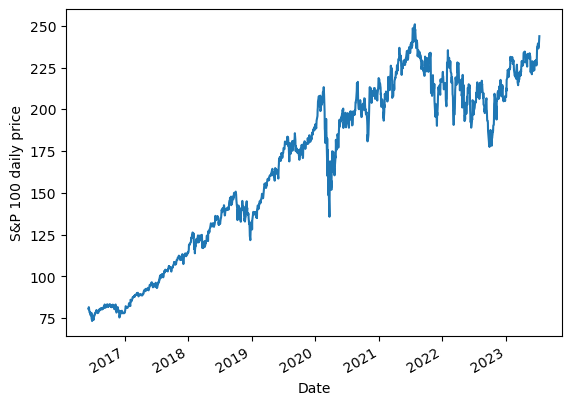

In [332]:
SP100_daily_prices = OEXframe['Adj Close'] 
print(SP100_daily_prices)

# Plot S&P 100 daily prices
daily_prices.plot()
plt.ylabel('S&P 100 daily price')
plt.show()

            S&P 100 daily log-returns
Date                                 
2016-06-07                   0.000354
2016-06-08                   0.003256
2016-06-09                  -0.001809
2016-06-10                  -0.007343
2016-06-13                  -0.007908
...                               ...
2023-07-07                  -0.004681
2023-07-10                  -0.001430
2023-07-11                   0.005591
2023-07-12                   0.009282
2023-07-13                   0.010188

[1787 rows x 1 columns]


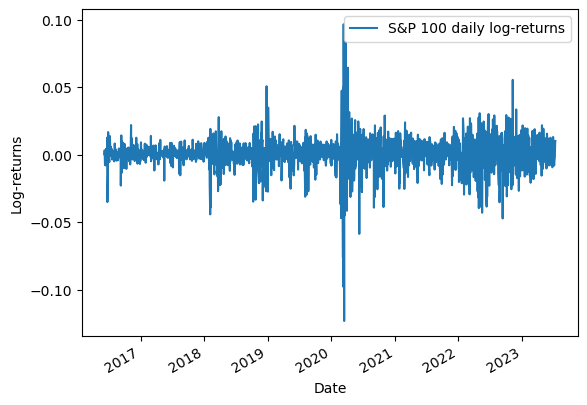

In [334]:
# Calculate S&P 100 daily log returns and create a DataFrame
SP100_daily_log_returns = np.diff(np.log(SP100_daily_prices))
SP100_daily_log_returns_df = pd.DataFrame({"S&P 100 daily log-returns":SP100_daily_log_returns},index=SP100_daily_prices.index[1:])
print(SP100_daily_log_returns_df)
SP100_daily_log_returns_df.plot()
plt.ylabel('Log-returns')
plt.show()

In [130]:
# Display descriptive statistics for S&P 100 daily log returns
SP100_daily_log_returns_df.describe()

,S&P 100 daily log-returns
count,1786.000000
mean,0.000449
std,0.012250
min,-0.122946
25%,-0.003807
50%,0.000567
75%,0.005941
max,0.096464


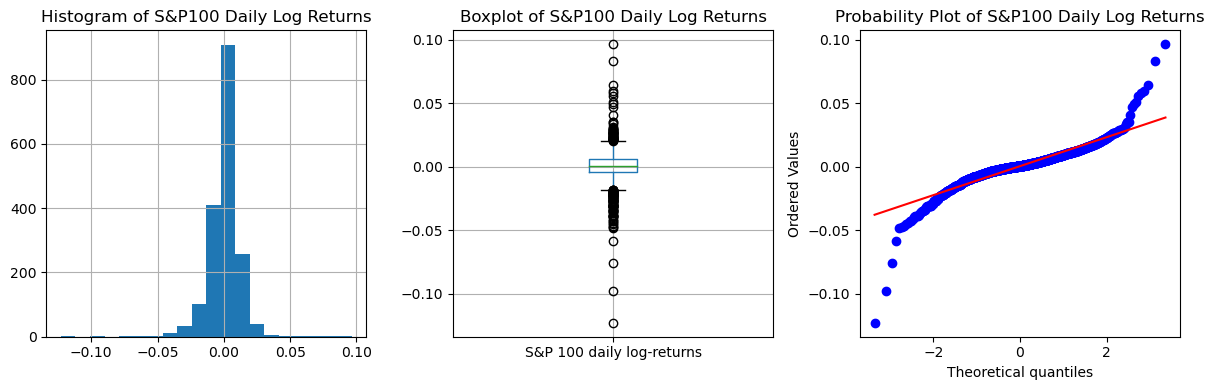

In [323]:
import matplotlib.pyplot as plt
from scipy import stats

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4)) # Create subplots with 1 row and 3 columns

SP100_daily_log_returns_df.hist(bins=20, ax=ax1)
ax1.set_title('Histogram of S&P100 Daily Log Returns')

SP100_daily_log_returns_df.boxplot(ax=ax2)
ax2.set_title('Boxplot of S&P100 Daily Log Returns')

stats.probplot(SP100_daily_log_returns, dist="norm", plot=ax3)
ax3.set_title('Probability Plot of S&P100 Daily Log Returns')

plt.tight_layout()

plt.show()


In [135]:
# Because large sample n < 2000, we don't use jarque_bera function in scipy.
import numpy as np
from scipy.stats import skew, kurtosis

def jb(n, s, k):
    return n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)


# Perform the Jarque-Bera test
result = jb_test(SP100_daily_log_returns)

# Print the test result
print("Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test:", result[0])
print("Empirical JB statistic:", result[1])
print("Critical value at 5% significance level:", result[2])


Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test: True
Empirical JB statistic: 15447.453084011753
Critical value at 5% significance level: 5.921585823936677


> *explanation: Based on the boxplot analysis, numerous outliers were identified. Additionally, we reject the null hypothesis, and the probability plot and Jarque-Bera test indicate the returns are not normally distributed.*

###### Monthly log-returns

Date
2016-06-30     928.130005
2016-07-31     961.750000
2016-08-31     960.080017
2016-09-30     958.679993
2016-10-31     943.869995
                 ...     
2023-03-31    1874.420044
2023-04-30    1913.119995
2023-05-31    1956.689941
2023-06-30    2074.489990
2023-07-31    2078.169922
Freq: M, Name: Adj Close, Length: 86, dtype: float64


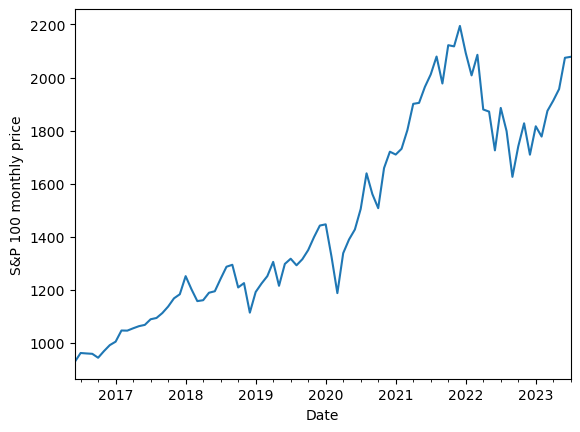

In [136]:
SP100_monthly_prices = SP100_daily_prices.resample('M').last() # Resample S&P 100 daily prices to monthly frequency
print(SP100_monthly_prices)
SP100_monthly_prices.plot()
plt.ylabel('S&P 100 monthly price')
plt.show()

            S&P 100 monthly log-returns
Date                                   
2016-07-31                     0.035583
2016-08-31                    -0.001738
2016-09-30                    -0.001459
2016-10-31                    -0.015569
2016-11-30                     0.026111
...                                 ...
2023-03-31                     0.053069
2023-04-30                     0.020436
2023-05-31                     0.022519
2023-06-30                     0.058461
2023-07-31                     0.001772

[85 rows x 1 columns]


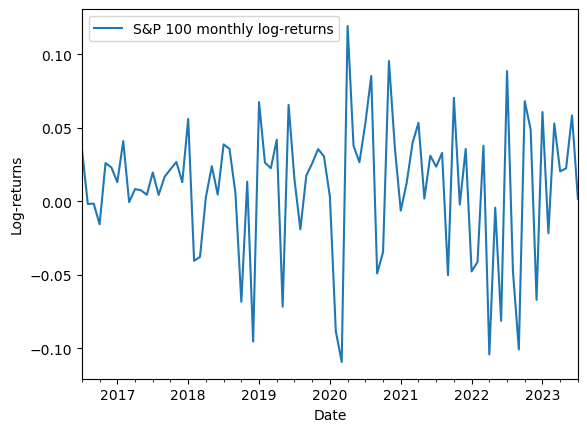

In [137]:
# Calculate S&P 100 monthly log returns and create a DataFrame
SP100_monthly_log_returns = np.diff(np.log(SP100_monthly_prices))
SP100_monthly_log_returns_df = pd.DataFrame({"S&P 100 monthly log-returns":SP100_monthly_log_returns},index=SP100_monthly_prices.index[1:])
print(SP100_monthly_log_returns_df)
SP100_monthly_log_returns_df.plot()
plt.ylabel('Log-returns')
plt.show()

In [140]:
SP100_monthly_log_returns_df.describe()

,S&P 100 monthly log-returns
count,85.000000
mean,0.009483
std,0.047011
min,-0.109149
25%,-0.004244
50%,0.017541
75%,0.036539
max,0.119358


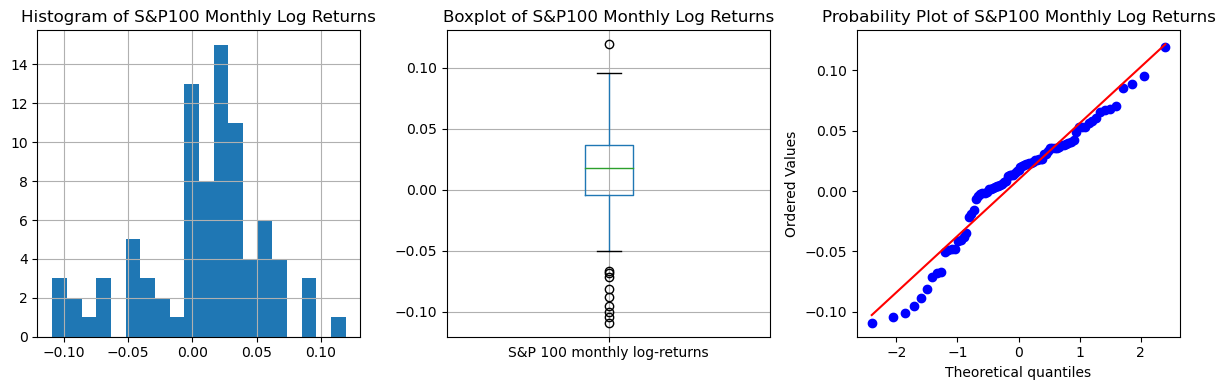

In [325]:
import matplotlib.pyplot as plt
from scipy import stats

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

SP100_monthly_log_returns_df.hist(bins=20, ax=ax1)
ax1.set_title('Histogram of S&P100 Monthly Log Returns')

SP100_monthly_log_returns_df.boxplot(ax=ax2)
ax2.set_title('Boxplot of S&P100 Monthly Log Returns')

stats.probplot(SP100_monthly_log_returns, dist="norm", plot=ax3)
ax3.set_title('Probability Plot of S&P100 Monthly Log Returns')

plt.tight_layout()

plt.show()


In [452]:
# Because large sample n < 2000, we don't use jarque_bera function in scipy.
import numpy as np
from scipy.stats import skew, kurtosis

def jb(n, s, k):
    return n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)


# Perform the Jarque-Bera test
result = jb_test(SP100_monthly_log_returns)

# Print the test result
print("Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test:", result[0])
print("Empirical JB statistic:", result[1])
print("Critical value at 5% significance level:", result[2])


Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test: True
Empirical JB statistic: 5.719254170565842
Critical value at 5% significance level: 5.292389232746026


> *explanation: Based on the boxplot analysis, numerous outliers were identified. Additionally, we reject the null hypothesis, and the probability plot and Jarque-Bera test indicate the returns are not normally distributed.*

###### Annual log-returns

Date
2016-12-31     991.429993
2017-12-31    1183.150024
2018-12-31    1113.869995
2019-12-31    1442.170044
2020-12-31    1720.500000
2021-12-31    2194.580078
2022-12-31    1709.170044
2023-12-31    2078.169922
Freq: A-DEC, Name: Adj Close, dtype: float64


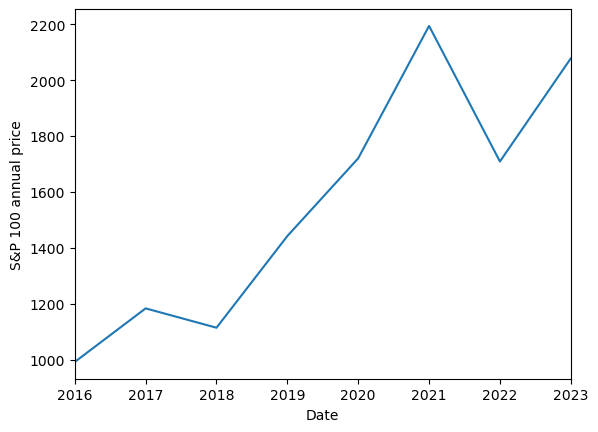

In [145]:
SP100_annual_prices = SP100_daily_prices.resample('A').last() #Both 'A' and 'Y' can be used to represent annual frequency.
print(SP100_annual_prices)
SP100_annual_prices.plot()
plt.ylabel('S&P 100 annual price')
plt.show()

            S&P 100 annual log-returns
Date                                  
2017-12-31                    0.176787
2018-12-31                   -0.060340
2019-12-31                    0.258309
2020-12-31                    0.176466
2021-12-31                    0.243376
2022-12-31                   -0.249983
2023-12-31                    0.195480


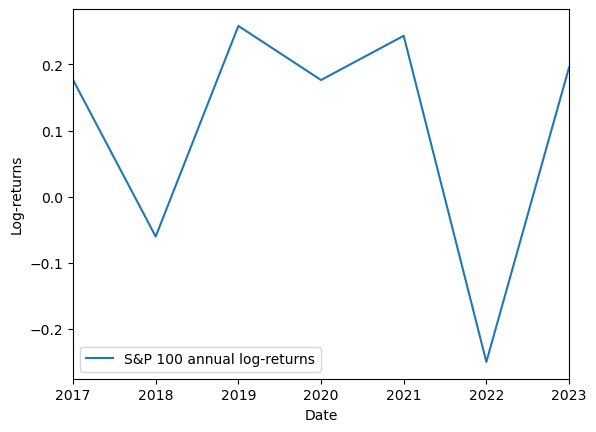

In [146]:
SP100_annual_log_returns = np.diff(np.log(SP100_annual_prices)) # Calculate S&P 100 annual log returns and create a DataFrame
SP100_annual_log_returns_df = pd.DataFrame({"S&P 100 annual log-returns":SP100_annual_log_returns},index=SP100_annual_prices.index[1:])
print(SP100_annual_log_returns_df)
SP100_annual_log_returns_df.plot()
plt.ylabel('Log-returns')
plt.show()

In [148]:
SP100_annual_log_returns_df.describe()

,S&P 100 annual log-returns
count,7.000000
mean,0.105728
std,0.189053
min,-0.249983
25%,0.058063
50%,0.176787
75%,0.219428
max,0.258309


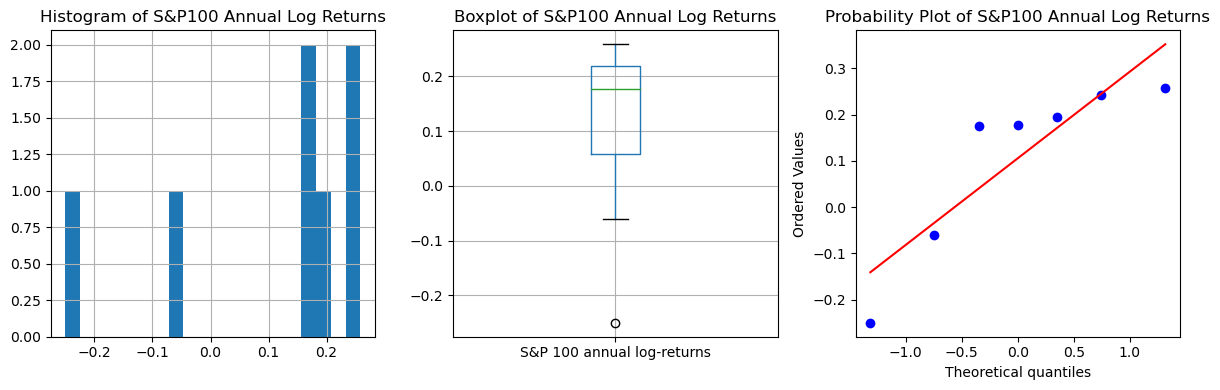

In [326]:
import matplotlib.pyplot as plt
from scipy import stats

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

SP100_annual_log_returns_df.hist(bins=20, ax=ax1)
ax1.set_title('Histogram of S&P100 Annual Log Returns')

SP100_annual_log_returns_df.boxplot(ax=ax2)
ax2.set_title('Boxplot of S&P100 Annual Log Returns')

stats.probplot(SP100_annual_log_returns, dist="norm", plot=ax3)
ax3.set_title('Probability Plot of S&P100 Annual Log Returns')

plt.tight_layout()

plt.show()


In [152]:
# Because large sample n < 2000, we don't use jarque_bera function in scipy.
import numpy as np
from scipy.stats import skew, kurtosis

def jb(n, s, k):
    return n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)


# Perform the Jarque-Bera test
result = jb_test(SP100_annual_log_returns)

# Print the test result
print("Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test:", result[0])
print("Empirical JB statistic:", result[1])
print("Critical value at 5% significance level:", result[2])

Shall we reject the null hypothesis? This suggests that the distribution is not normal based on the JB test: False
Empirical JB statistic: 1.4852144180147424
Critical value at 5% significance level: 1.855784930381578


> *explanation: Based on the Jarque-Bera test, we don't reject the null hypothesis, which means that the returns are normally distributed.*

### Exercise 4
Estimate the $α$ and $β$ of each stock according to the single-index model using ordinary least squares regression over monthly excess returns, storing your results in a DataFrame. Produce a single graph showing side-by-side boxplots summarising the distribution of the alpha and beta coefficients over all stocks in the index.

> *explanation: Below I will conduct linear regression analysis on monthly stock returns, storing alpha and beta coefficients for each stock and visualizing their distribution through a boxplot.*

         alpha      beta
AAPL  0.014345  1.325003
VZ   -0.009104  0.393121
WBA  -0.016122  0.657223
WFC  -0.008425  1.087862
WMT   0.003784  0.581442
...        ...       ...
UPS  -0.001760  1.093313
USB  -0.007869  0.882707
V     0.005990  0.933120
ABBV  0.005502  0.590599
ACN   0.001775  1.199063

[98 rows x 2 columns]


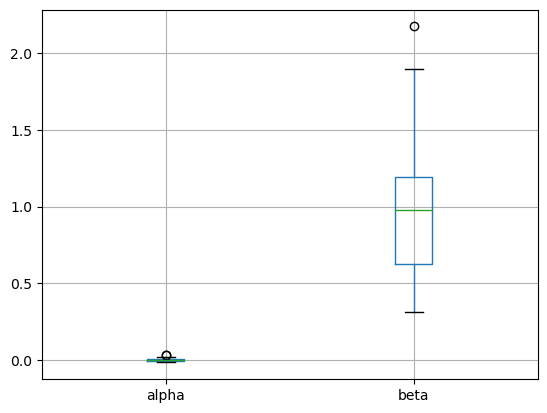

In [470]:
Allcolumnlist= list(cleandata.columns) # Store the stocks' name into a list for later use

# Import necessary libraries
import scipy.stats as stats
import numpy as np

# Initialize empty lists to store alpha and beta values
alpha = []
beta = []


for i in Allcolumnlist[1:]: # Iterate over each column (excluding the first one "Date") 
    stock_daily_prices = cleandata[i] # Extract daily stock prices
    stock_monthly_prices = stock_daily_prices.resample('M').last()  # Resample daily prices to monthly and take the last price of each month
    stock_monthly_log_returns = np.diff(np.log(stock_monthly_prices)) # Calculate monthly log returns
    stock_monthly_log_returns_df = pd.DataFrame({"stock monthly log-returns":stock_monthly_log_returns},index=stock_monthly_prices.index[1:])
    index_simple_returns_df = np.exp(SP100_monthly_log_returns_df) - 1 # Calculate simple returns for index based on the data from exercise 3
    stock_simple_returns_df = np.exp(stock_monthly_log_returns_df) - 1
    rr = 0.01/12 # risk-free rate per month
    xdata = index_simple_returns_df.values[:,0] - rr  #independent variable
    ydata = stock_simple_returns_df.values[:,0] - rr #dependent variable
    regression_result = stats.linregress(x=xdata, y=ydata) # Perform linear regression
    a = regression_result[1] # Extract alpha and beta coefficients
    alpha.append(a)
    b = regression_result[0]
    beta.append(b)

data = {'alpha': alpha , 'beta': beta }
ab_df = pd.DataFrame(data, index= Allcolumnlist[1:]) 
print(ab_df)   
ab_df.boxplot() # Create a boxplot to visualize the distribution of alpha and beta values
plt.show()

### Exercise 5

Compute the covariance matrix of the components of the index using the monthly excess-returns. According to the single-index model (see Elton and Gruber 1997; reference below), the covariance of a given pair of stocks should be directly proportional to the product of the corresponding $β$ values. Test this hypothesis, and summarise your results in a single graph. Provide a written explanation of your results, and a short critical discussion.

> *explanation: I will use theoretical covariance*
$\text{Cov}(\beta_1, \beta_2) = \beta_1 \cdot \beta_2 \cdot \sigma^2_{\text{market}} $ *and linear regression to do the  hypothesis. In this theoretical framework, the expected value for the intercept (alpha) is close to zero, while the theoretical value for the slope (beta) is: $ \sigma^2_{\text{market}} $.*

In [418]:
Allcolumnlist= list(cleandata.columns) # Extracting the list of column names from the 'cleandata' DataFrame

# Importing necessary libraries
import scipy.stats as stats 
import numpy as np

# Function to calculate the monthly returns for a given stock symbol
def returns_df(symbol, frequency='M'):
    stock_daily_prices = cleandata[symbol]
    stock_monthly_prices = stock_daily_prices.resample(frequency).last() 
    column_name = symbol 
    return pd.DataFrame({column_name: np.exp(np.diff(np.log(stock_monthly_prices))) - 1.}, index=stock_monthly_prices.index[1:])


# Initializing a DataFrame for storing monthly returns of various stocks, starting with S&P 100
compar_df = index_simple_returns_df = np.exp(SP100_monthly_log_returns_df) - 1
compar_df.rename(columns={'S&P 100 monthly log-returns': 'S&P 100 monthly simple-returns'}, inplace=True)

# Looping through each stock symbol (excluding the first one) to calculate and append monthly returns to the DataFrame
for i in Allcolumnlist[1:]:
    stock_returns = returns_df(i, frequency='M')
    compar_df = pd.concat([compar_df, stock_returns], axis=1) # Concatenating the calculated returns to the existing DataFrame
    
compar_df      

,S&P 100 monthly simple-returns,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.036223,0.090063,-0.007701,-0.048277,0.013522,-0.000685,-0.051099,0.138387,0.021610,0.029306,...,0.070950,0.106039,0.113328,0.014164,0.066476,0.003528,0.045624,0.052312,0.069779,-0.004237
2016-08-31,-0.001736,0.018136,-0.055586,0.018423,0.058995,-0.020968,-0.020348,-0.061006,0.045473,0.099008,...,0.000000,-0.097023,-0.003011,-0.049930,0.026652,0.010361,0.046953,0.036515,-0.032161,0.019413
2016-09-30,-0.001458,0.065504,-0.006688,-0.001115,-0.128346,0.009518,0.001607,0.006426,0.060893,-0.008190,...,0.008200,-0.037640,0.009203,0.029033,0.020936,0.001282,-0.028539,0.022250,-0.016069,0.062348
2016-10-31,-0.015448,0.004334,-0.074644,0.026172,0.039070,-0.029118,-0.045371,-0.072121,-0.009490,0.039771,...,0.064426,-0.030878,0.009547,0.009500,-0.095868,-0.014631,0.043600,-0.002297,-0.115586,-0.048539
2016-11-30,0.026455,-0.026599,0.037422,0.024175,0.150185,0.005856,0.047768,-0.029817,-0.043717,0.026418,...,0.090086,-0.042128,0.043472,0.120215,0.149127,0.075724,0.108579,-0.062901,0.089996,0.027443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.054502,0.118649,0.002061,-0.026738,-0.200770,0.037430,-0.002275,-0.004522,0.189597,-0.175912,...,0.018709,0.008507,0.084923,-0.007039,-0.029043,0.063017,-0.244710,0.025098,0.035543,0.076295
2023-04-30,0.020646,0.028987,-0.001543,0.019375,0.063403,0.023873,0.079154,0.090954,-0.020266,0.053217,...,-0.006490,-0.207992,-0.101124,0.041262,-0.027626,-0.073097,-0.049098,0.032245,-0.051766,-0.019313
2023-05-31,0.022774,0.044613,-0.082411,-0.138440,0.001509,-0.027158,-0.136556,-0.076672,0.106553,-0.003959,...,-0.046213,0.241130,0.039952,-0.009856,-0.016249,-0.071242,-0.127771,-0.050273,-0.087083,0.091441


In [365]:
components_comparing = compar_df.iloc[:,1:]
rr = 0.01/12 # risk-free rate per month
components_comparing = components_comparing - rr
components_comparing 

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.089229,-0.008534,-0.049110,0.012689,-0.001518,-0.051932,0.137554,0.020776,0.028473,0.129827,...,0.070117,0.105206,0.112495,0.013331,0.065642,0.002694,0.044790,0.051479,0.068945,-0.005070
2016-08-31,0.017303,-0.056419,0.017589,0.058162,-0.021801,-0.021182,-0.061839,0.044640,0.098175,-0.012285,...,-0.000833,-0.097856,-0.003844,-0.050763,0.025819,0.009527,0.046120,0.035682,-0.032994,0.018580
2016-09-30,0.064671,-0.007522,-0.001948,-0.129180,0.008685,0.000773,0.005592,0.060060,-0.009023,-0.019944,...,0.007367,-0.038473,0.008370,0.028200,0.020102,0.000448,-0.029372,0.021416,-0.016902,0.061514
2016-10-31,0.003501,-0.075477,0.025339,0.038236,-0.029952,-0.046205,-0.072954,-0.010323,0.038937,-0.154601,...,0.063593,-0.031711,0.008714,0.008667,-0.096701,-0.015464,0.042767,-0.003131,-0.116419,-0.049372
2016-11-30,-0.027432,0.036589,0.023342,0.149351,0.005022,0.046934,-0.030650,-0.044550,0.025585,0.019782,...,0.089253,-0.042961,0.042639,0.119382,0.148293,0.074890,0.107746,-0.063735,0.089163,0.026610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.117815,0.001228,-0.027571,-0.201603,0.036597,-0.003108,-0.005356,0.188764,-0.176746,0.042722,...,0.017875,0.007674,0.084089,-0.007872,-0.029876,0.062184,-0.245543,0.024264,0.034709,0.075461
2023-04-30,0.028154,-0.002376,0.018542,0.062570,0.023039,0.078320,0.090121,-0.021100,0.052384,-0.009148,...,-0.007323,-0.208825,-0.101957,0.040429,-0.028459,-0.073930,-0.049932,0.031412,-0.052600,-0.020147
2023-05-31,0.043780,-0.083244,-0.139273,0.000676,-0.027991,-0.137389,-0.077506,0.105719,-0.004793,-0.080461,...,-0.047046,0.240296,0.039119,-0.010689,-0.017083,-0.072075,-0.128605,-0.051106,-0.087916,0.090608


In [366]:
covariance_matrix =components_comparing.cov() # Calculating the covariance matrix 
covariance_matrix

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
AAPL,0.006988,0.000540,0.001081,0.001730,0.001717,0.001727,0.001800,0.004632,0.000925,0.001729,...,0.001508,0.009175,0.002686,0.001476,0.002288,0.002638,0.001286,0.002812,0.000566,0.003483
VZ,0.000540,0.002384,0.001165,0.001311,0.000831,0.001429,0.001046,0.000643,0.000630,0.001237,...,0.000710,0.000850,0.000690,0.000746,0.000868,0.001663,0.001292,0.001111,0.000872,0.001006
WBA,0.001081,0.001165,0.006512,0.002761,0.001366,0.002657,0.001774,0.000769,0.001754,0.002547,...,0.001125,0.000398,0.001115,0.001691,0.001559,0.002426,0.002274,0.001004,0.001315,0.001755
WFC,0.001730,0.001311,0.002761,0.008072,0.000968,0.005252,0.000808,0.001823,0.004982,0.001565,...,0.001360,0.004086,0.002348,0.001826,0.002886,0.002808,0.005519,0.002668,0.002011,0.002405
WMT,0.001717,0.000831,0.001366,0.000968,0.002897,0.000873,0.001047,0.001346,0.000936,0.000861,...,0.000832,0.002694,0.001085,0.001328,0.001323,0.001922,0.000592,0.001202,0.000410,0.001629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,0.002638,0.001663,0.002426,0.002808,0.001922,0.001928,0.001882,0.002813,0.002310,0.001971,...,0.001486,0.004288,0.002273,0.002102,0.003340,0.006808,0.002665,0.001911,0.001789,0.002848
USB,0.001286,0.001292,0.002274,0.005519,0.000592,0.003740,0.001011,0.001730,0.004960,0.001137,...,0.001384,0.002062,0.002325,0.001429,0.002550,0.002665,0.005991,0.002238,0.001286,0.001992
V,0.002812,0.001111,0.001004,0.002668,0.001202,0.002796,0.001488,0.003037,0.002570,0.001890,...,0.001743,0.003407,0.001964,0.001310,0.001934,0.001911,0.002238,0.003790,0.001529,0.002614
ABBV,0.000566,0.000872,0.001315,0.002011,0.000410,0.001827,0.001191,0.000860,0.002504,0.002128,...,0.001002,0.001444,0.001438,0.001951,0.002228,0.001789,0.001286,0.001529,0.006215,0.001887


In [485]:
beta= ab_df.iloc[:,1:]
beta_value = ab_df['beta']

# Calculating the product of beta values for all pairs of stocks
product_beta = {(s1, s2): beta_value[s1] * beta_value[s2] for i, s1 in enumerate(beta_value.index) for j, s2 in enumerate(beta_value.index) if i < j}
print(product_beta)


{('AAPL', 'VZ'): 0.520886405189751, ('AAPL', 'WBA'): 0.8708219885335311, ('AAPL', 'WFC'): 1.441420619499114, ('AAPL', 'WMT'): 0.7704118901910645, ('AAPL', 'XOM'): 1.3036086527165378, ('AAPL', 'ABT'): 0.949235302531575, ('AAPL', 'ADBE'): 1.7589257567606786, ('AAPL', 'AIG'): 1.3021599524040748, ('AAPL', 'AMGN'): 0.922071043518488, ('AAPL', 'AMT'): 0.7248309958713579, ('AAPL', 'AMZN'): 1.7819693701811108, ('AAPL', 'AVGO'): 1.4308946354988035, ('AAPL', 'AXP'): 1.4484973071995613, ('AAPL', 'BA'): 1.7992019432096544, ('AAPL', 'BAC'): 1.7236146865039557, ('AAPL', 'BIIB'): 0.4165145719974011, ('AAPL', 'BK'): 1.3325221153938045, ('AAPL', 'BKNG'): 1.6147345071025812, ('AAPL', 'BLK'): 1.6767211284612806, ('AAPL', 'BMY'): 0.6049412648698599, ('AAPL', 'C'): 1.9317211795294382, ('AAPL', 'CAT'): 1.4088968547587672, ('AAPL', 'CHTR'): 1.4712449457797447, ('AAPL', 'CL'): 0.6162538800367073, ('AAPL', 'CMCSA'): 1.3310236959744657, ('AAPL', 'COF'): 1.8002312651125514, ('AAPL', 'COP'): 1.5123277626785276, (

Intercept α: 0.00018367322410377924
Slope β: 0.002164658591391653
Variance of S&P 100 Market Index: 0.002169463338904781
R-squared: 0.5980510965193697
P-value: 0.0
Standard Error: 2.5746202031102396e-05


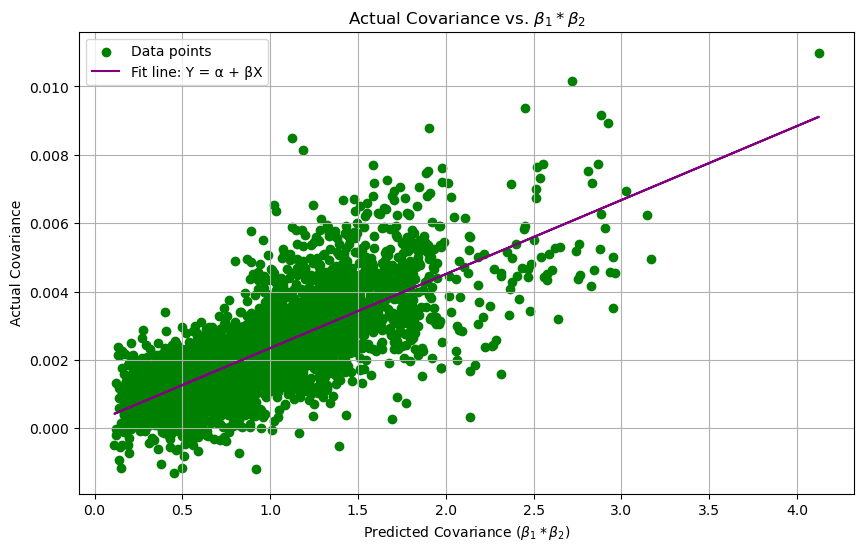

In [491]:
rr = 0.01 / 12 
index_simple_returns = np.exp(SP100_monthly_log_returns) - 1
index_excess_returns = index_simple_returns - rr
index_variance = index_excess_returns.var() # Calculating the variance of the excess returns of the S&P 100 index

# Creating arrays for X_data (product of beta values) and Y_data (covariance matrix values)
X_data = np.array([product_beta[p] for p in product_beta])
Y_data = np.array([covariance_matrix.loc[p] for p in product_beta])


# Performing linear regression to estimate the alpha (intercept) and beta (slope) coefficients
slope, intercept, R , p_value, standard_error = stats.linregress(X_data, Y_data)

print("Intercept α:", intercept)
print("Slope β:", slope)
print("Variance of S&P 100 Market Index:",index_variance)
print("R-squared:", R**2)
print("P-value:", p_value)
print("Standard Error:", standard_error)


# Plotting the actual covariance against the predicted covariance using the regression model
plt.figure(figsize=(10, 6))
plt.scatter(X_data, Y_data, color='green', label='Data points')  
plt.plot(X_data, intercept + slope * X_data, color='purple', label='Fit line: Y = α + βX')  
plt.title(r'Actual Covariance vs. $\beta_1 * \beta_2$')
plt.xlabel(r'Predicted Covariance ($\beta_1 * \beta_2$)')
plt.ylabel('Actual Covariance')  
plt.grid(True)
plt.legend() 
plt.show()

> *explanation:The proximity of the intercept to zero aligns with the hypothesis, and the calculated slope of 0.00216465 supports the hypothesis, given that the market's variance $ \sigma^2_{\text{market}} $ is 0.00216946.*

**discussion:**
> I believe that a single-index model oversimplifies the complexities of the financial markets. While the model assumes a correlation between stock movements and market trends, correlation does not necessarily imply causation. In investment decision-making, it is crucial to handle the limitations of the model carefully to avoid making inaccurate predictions or causal inferences by overlooking essential factors. 
>
> In reality, the movements of markets and stock prices can be influenced by a multitude of complex and interconnected factors, such as emotions and market psychology, changes in economic indicators, government policies, specific circumstances of companies or industries, and nonlinear stock price fluctuations. A single model may struggle to comprehensively encompass all possible variations.
>
>Therefore, in making investment decisions, I believe it is essential to consider employing more comprehensive and flexible models while prudently assessing risks. Through in-depth research and analysis to understand the underlying motivations and mechanisms, one can gain a more holistic understanding of how the market operates, leading to more informed and judicious investment decisions.

### References

Cont, R. (2001). Empirical properties of asset returns: stylized facts and statistical issues. Quantitative Finance, 1(2), 223–236. https://doi.org/10.1080/713665670

Elton, E. J., & Gruber, M. J. (1997). Modern portfolio theory, 1950 to date. Journal of Banking and Finance, 21(11–12), 1743–1759. https://doi.org/10.1016/S0378-4266(97)00048-4